In [1]:
import pandas as pd

In [2]:
#df = pd.read_csv('../data/sales.csv')
df = pd.read_csv('sales.csv')

In [3]:
df.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth
0,$333k,"$300,492",3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm
1,NaN,"$430,570",3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm
2,$270k,"$213,070",3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm
3,NaN,"$229,174",3 Ton 50 Kg,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2.5 meters,102 cm,27 cm
4,$97k,"$122,659",2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm


# 1. Dtype

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   cost           2216 non-null   object
 1   price          3186 non-null   object
 2   weight         3193 non-null   object
 3   purchase_date  3196 non-null   object
 4   product_type   3196 non-null   object
 5   product_level  3196 non-null   object
 6   maker          2373 non-null   object
 7   ingredient     2941 non-null   object
 8   height         3197 non-null   object
 9   width          3193 non-null   object
 10  depth          3193 non-null   object
dtypes: object(11)
memory usage: 274.9+ KB


In [5]:
df.describe()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth
count,2216,3186,3193,3196,3196,3196,2373,2941,3197,3193,3193
unique,185,3157,119,1278,64,5,882,2833,161,41,13
top,$66k,"$20,061",3 Ton 0 Kg,Oct 05 2001,D,advanced,M14196,IN732638,2.54 meters,99 cm,26 cm
freq,104,2,127,8,485,1323,17,8,63,268,903


In [6]:
df.cost.dtype

dtype('O')

<font color='red'>Question:</font> What is **dtype** for? What does **dtype('O')** mean?

### dtype is for data type. dtype('O') means this is a Python object, in Pandas, most of the time this means the data type is string or a mix of string, number and/or NaN.

In [7]:
df.cost.head()

0    $333k
1      NaN
2    $270k
3      NaN
4     $97k
Name: cost, dtype: object

In [8]:
df.cost.count()

2216

In [9]:
len(df.cost)

3197

<font color='red'>Question:</font> What do "count" and "len" do? Why are their results different?

### count counts the number of non-NaN rows while len counts the number of all rows including NaN. Since the cost column contains a significant number of NaN, it's not surprising that the two numbers are very different.

# 2. Transform strings to numerical values

## 2.1 Function

**Example:** A funcition which transform a string to a numerical value

In [10]:
def cost2num_long(x):
    """
    This function transform cost string to numerical value.
    """
    if type(x) == str: # only works when x is a string
        x = x.strip('$') # remove the dollar sign in the front of the substring
        x = x.strip('k') # remove 'k' at the end of the substring
    return float(x)*1000 # multiply the number with 1000

**Example:** Test the function

In [11]:
#cost2num_long('')
#cost2num_long('$1')
#cost2num_long('$1M')

**Example:** A short version of this function

In [7]:
def cost2num(x):
    """
    This function transform cost string to numerical value.
    """
    if type(x) == str: 
        x = x.strip('$').strip('k')
    return float(x)*1000

## 2.2 Use above function for data transformation

**Example**: Apply the function elementwise using **map**.

In [8]:
df.cost.head()

0    $333k
1      NaN
2    $270k
3      NaN
4     $97k
Name: cost, dtype: object

In [9]:
df.cost.map(cost2num).head()
# elementwise. What are the elements in df.cost?

0    333000.0
1         NaN
2    270000.0
3         NaN
4     97000.0
Name: cost, dtype: float64

In [10]:
type(df.cost.map(cost2num))

pandas.core.series.Series

In [15]:
## df.cost.map(function here)

In [16]:
################## map() and apply() ★★★★
# Series.map(func), Series.map(dict)
# Series.apply(func), DataFrame.apply(func)

In [12]:
df2 = pd.DataFrame({"a":["basic","good","super"], "b":[10,20,23]})
df2

,a,b
0,basic,10
1,good,20
2,super,23


In [13]:
df2["a"] = df2.a.map({"basic":0, "good":1, "super":2})
df2
# .map(dict) very useful when you work with categorical features

,a,b
0,0,10
1,1,20
2,2,23


In [19]:
def calc(x, y):
    if 
    return x**2 + y/10

In [20]:
df2["new"] = df2.apply(lambda x: calc(x.a, x.b), axis=1)   
# x is the element. What are the elements of df2?
# "lambda" allows you to define a function in line
# same as: df2["new"] = df2.apply(lambda x: (x.a)**2+(x.b)/10, axis=1)
df2

# .apply(lambda ) can be used for single and multiple columns, very powerful

,a,b,new
0,0,10,1.0
1,1,20,3.0
2,2,23,6.3


**Example**: Assign the new **Series** to a variable

In [21]:
cost = df.cost.map(cost2num)

**Example**: Add the new **Series** to **DataFrame**

In [17]:
len(df.columns)

11

In [18]:
df['cost_num'] = df.cost.map(cost2num)

In [19]:
len(df.columns)

12

In [20]:
df.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth,cost_num
0,$333k,"$300,492",3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm,333000.0
1,NaN,"$430,570",3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm,NaN
2,$270k,"$213,070",3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm,270000.0
3,NaN,"$229,174",3 Ton 50 Kg,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2.5 meters,102 cm,27 cm,NaN
4,$97k,"$122,659",2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm,97000.0


**Example:** Change the values of this numerical column

In [21]:
(df.cost_num*2).head()

0    666000.0
1         NaN
2    540000.0
3         NaN
4    194000.0
Name: cost_num, dtype: float64

**Knowledge**: Please note that this piece of data we are playing with are only a copy of the column in the dataframe. The above operation doesn't change anything in the dataframe

In [22]:
a=[1,2,3]     
print("List:\n", a*2)  # not elementwise for list
a=pd.Series([1,2,3])
print("Series:\n", a*2)  # elementwise for Series
import numpy as np
a=np.array([1,2,3])
print("Array:\n", a*2)  # elementwise for array

List:
 [1, 2, 3, 1, 2, 3]
Series:
 0    2
1    4
2    6
dtype: int64
Array:
 [2 4 6]


In [23]:
df.cost_num.head()

0    333000.0
1         NaN
2    270000.0
3         NaN
4     97000.0
Name: cost_num, dtype: float64

# 3. Data Visualization

In [24]:
%matplotlib inline 

**Knowledge**: We are going to visualize data, matplotlib is built in pandas with this line, we don't need to import matplotlib explictly

**Example:** Visulizing distribution

<AxesSubplot:ylabel='Frequency'>

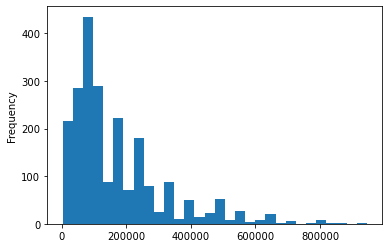

In [25]:
df.cost_num.plot(kind='hist', bins=30)


**Example**: log the **counts** to reveal more details

<AxesSubplot:ylabel='Frequency'>

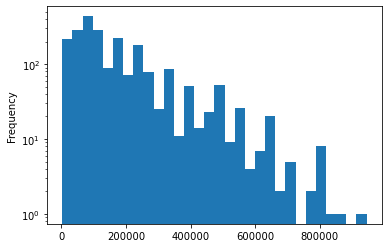

In [26]:
df.cost_num.plot(kind='hist', bins=30, log=True) 

**Example**: Log the **cost values** to remove the skewness

<AxesSubplot:ylabel='Frequency'>

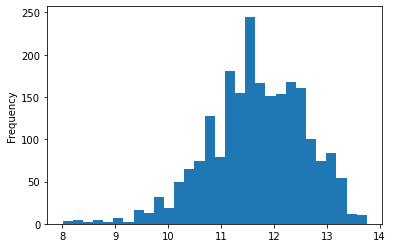

In [27]:
import numpy as np

df.cost_num.map(np.log).plot(kind='hist', bins=30)

<font color='red'>Question:</font> What is **log-normal distribution**?

### A log-normal distribution is a continuous probability distribution of a random variable whose logarithm is normally distributed.

<font color='red'>Assignment:</font> Transform **price**, **weight**, **height**, **width**, and **depth**; visualize their distributions

In [29]:
def price2num(x):
    """
    This function transform price string to numerical value.
    """
    if type(x) == str: # only works when x is a string
        x = x.strip('$') # remove the dollar sign at the front of the substring
        x = x.replace(',', '') # remove ','
    return float(x)

In [30]:
df['price'] = df.price.map(price2num)

In [31]:
df.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth,cost_num
0,$333k,300492.0,3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm,333000.0
1,NaN,430570.0,3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm,NaN
2,$270k,213070.0,3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm,270000.0
3,NaN,229174.0,3 Ton 50 Kg,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2.5 meters,102 cm,27 cm,NaN
4,$97k,122659.0,2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm,97000.0


In [32]:
def weight2num(x):
    """
    This function transform weight string to numerical value. The unit kept is Ton
    """
    if type(x) == str: # only works when x is a string
        x = x.strip(' Kg') # remove the ' Kg' at the end of the substring
        #x = x.replace(' Ton ','.')
        x_list = x.split(' Ton ')
        result = float(x_list[0])+float(x_list[1])*0.001
        return result
    return

In [33]:
df['weight'] = df.weight.map(weight2num)

In [34]:
df.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth,cost_num
0,$333k,300492.0,3.09,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm,333000.0
1,NaN,430570.0,3.03,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm,NaN
2,$270k,213070.0,3.04,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm,270000.0
3,NaN,229174.0,3.05,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2.5 meters,102 cm,27 cm,NaN
4,$97k,122659.0,2.97,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm,97000.0


In [35]:
def height2num(x):
    """
    This function transform height string to numerical value. The unit kept is meters
    """
    if type(x) == str: # only works when x is a string
        x = x.strip(' meters') # remove the ' meters' at the end of the substring
    return float(x)

In [36]:
df['height'] = df.height.map(height2num)

In [37]:
df.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth,cost_num
0,$333k,300492.0,3.09,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76,97 cm,26 cm,333000.0
1,NaN,430570.0,3.03,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67,98 cm,26 cm,NaN
2,$270k,213070.0,3.04,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.00,93 cm,24 cm,270000.0
3,NaN,229174.0,3.05,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2.50,102 cm,27 cm,NaN
4,$97k,122659.0,2.97,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47,101 cm,26 cm,97000.0


In [38]:
def width2num(x):
    """
    This function transform width string to numerical value. The unit kept is cm
    """
    if type(x) == str: # only works when x is a string
        x = x.strip(' cm') # remove the ' cm' at the end of the substring
    return float(x)

In [39]:
df['width'] = df.width.map(width2num)

In [40]:
df.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth,cost_num
0,$333k,300492.0,3.09,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76,97.0,26 cm,333000.0
1,NaN,430570.0,3.03,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67,98.0,26 cm,NaN
2,$270k,213070.0,3.04,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.00,93.0,24 cm,270000.0
3,NaN,229174.0,3.05,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2.50,102.0,27 cm,NaN
4,$97k,122659.0,2.97,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47,101.0,26 cm,97000.0


In [41]:
def depth2num(x):
    """
    This function transform depth string to numerical value. The unit kept is cm
    """
    if type(x) == str: # only works when x is a string
        x = x.strip(' cm') # remove the ' cm' at the end of the substring
    return float(x)

In [42]:
df['depth'] = df.depth.map(depth2num)

In [43]:
df.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth,cost_num
0,$333k,300492.0,3.09,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76,97.0,26.0,333000.0
1,NaN,430570.0,3.03,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67,98.0,26.0,NaN
2,$270k,213070.0,3.04,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.00,93.0,24.0,270000.0
3,NaN,229174.0,3.05,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2.50,102.0,27.0,NaN
4,$97k,122659.0,2.97,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47,101.0,26.0,97000.0


# Visulization

## (1) price

In [44]:
len(df['price'].unique())

3158

In [49]:
# Sturges' Rule: Optimal Bins = ⌈log(2)(n) + 1⌉
1 + 3.322 * np.log(3158)  # = 1+log2(n)

# https://www.zhihu.com/question/22689569
# error in solution: 
# The base in 1+3.322*log(n) should be 10, 
# and n should be n_samples, not nunique (Sturges's rule is used for normal distribution)
# https://accendoreliability.com/sturges-rule-method-selecting-number-bins-histogram/ 
#      the rule is good for n_samples 30~200

# there is no "right" or "wrong" of bins. Sturges' rule is just a reference
# too few bins --> can't get underline pattern of the dataset
# too many bins --> get noise of the dataset

27.76766011517738

In [45]:
np.log(100)

4.605170185988092

<AxesSubplot:ylabel='Frequency'>

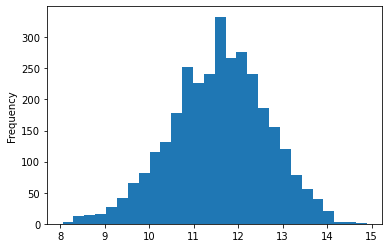

In [46]:
df.price.map(np.log).plot(kind = 'hist', bins = 28)

In [47]:
len(df['weight'].unique())

120

In [48]:
1 + 3.322 * np.log(120)

16.904047569521957

Text(0.5, 0, 'Weight')

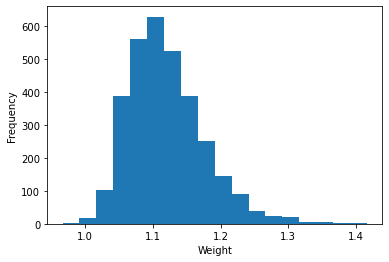

In [49]:
df.weight.map(np.log).plot(kind = 'hist', bins = 18)
import matplotlib.pyplot as plt
plt.xlabel('Weight')

In [55]:
len(df['height'].unique())

161

In [56]:
1 + 3.322 * np.log(161)

17.880425300478386

<AxesSubplot:ylabel='Frequency'>

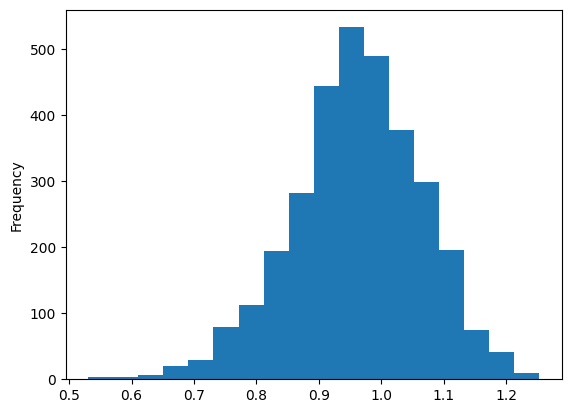

In [57]:
df.height.map(np.log).plot(kind = 'hist', bins = 18)

In [58]:
len(df['width'].unique())

42

In [59]:
1 + 3.322 * np.log(42)

13.41653847193735

<AxesSubplot:ylabel='Frequency'>

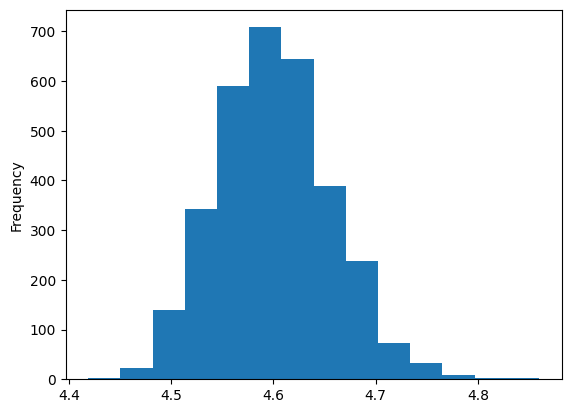

In [60]:
df.width.map(np.log).plot(kind = 'hist', bins = 14)

In [61]:
len(df['depth'].unique())

14

In [62]:
1 + 3.322 * np.log(14)

9.76694844898189

<AxesSubplot:ylabel='Frequency'>

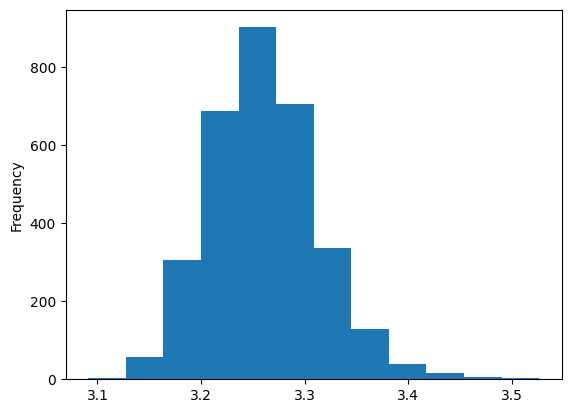

In [63]:
df.depth.map(np.log).plot(kind = 'hist', bins = 12)

## Everything looks log-normal, except for weight, which seems to be right-skewed.

In [64]:
import matplotlib.pyplot as plt

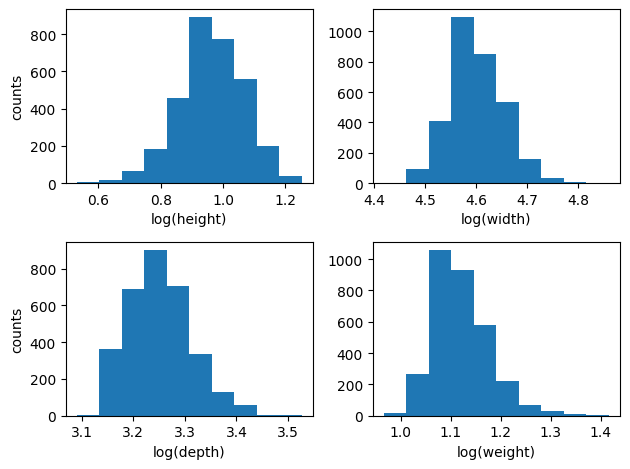

In [65]:
fig,axes = plt.subplots(nrows=2, ncols=2)

axes[0][0].hist(df.height.map(np.log))
axes[0][0].set_xlabel("log(height)")
axes[0][0].set_ylabel("counts")

axes[0][1].hist(df.width.map(np.log))
axes[0][1].set_xlabel("log(width)")

axes[1][0].hist(df.depth.map(np.log))
axes[1][0].set_xlabel("log(depth)")
axes[1][0].set_ylabel("counts")

axes[1][1].hist(df.weight.map(np.log))
axes[1][1].set_xlabel("log(weight)")

plt.tight_layout();

In [66]:
# use for-loop to plot
# use function to plot